In [106]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [107]:
GridX = 50
GridY = 100
TileX = 32
TileY = 16

DataDir = "../../build/Release"

In [108]:
Samples = np.fromfile(f"{DataDir}/learning.bin", dtype=np.float32, count=GridX * GridY * TileY * TileX * 2).reshape((GridY, GridX, TileY, TileX, 2))[:,:,:,:,0]

def get_samples(gx:int, gy:int):
    return Samples[gy, gx, :, :]
    
Counts = np.fromfile(f"{DataDir}/learning.bin", dtype=np.int32, count=GridX * GridY * TileY * TileX * 2).reshape((GridY, GridX, TileY, TileX, 2))[:,:,:,:,1]

def get_counts(gx:int, gy:int):
    return Counts[gy, gx, :, :]

def get_grid_counts():
    return np.sum(Counts, axis=(2,3), dtype=np.int64)

Marginal = np.fromfile(f"{DataDir}/marg.bin", dtype=np.float32, count=GridX * GridY * TileY).reshape((GridY, GridX, TileY, 1))

def get_marginal(gx:int, gy:int):
    return Marginal[gy, gx, :, :]

Conditional = np.fromfile(f"{DataDir}/cond.bin", dtype=np.float32, count=GridX * GridY * TileY * TileX).reshape((GridY, GridX, TileY, TileX))

def get_conditional(gx:int, gy:int):
    return Conditional[gy, gx, :, :]

## Grid Overview

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


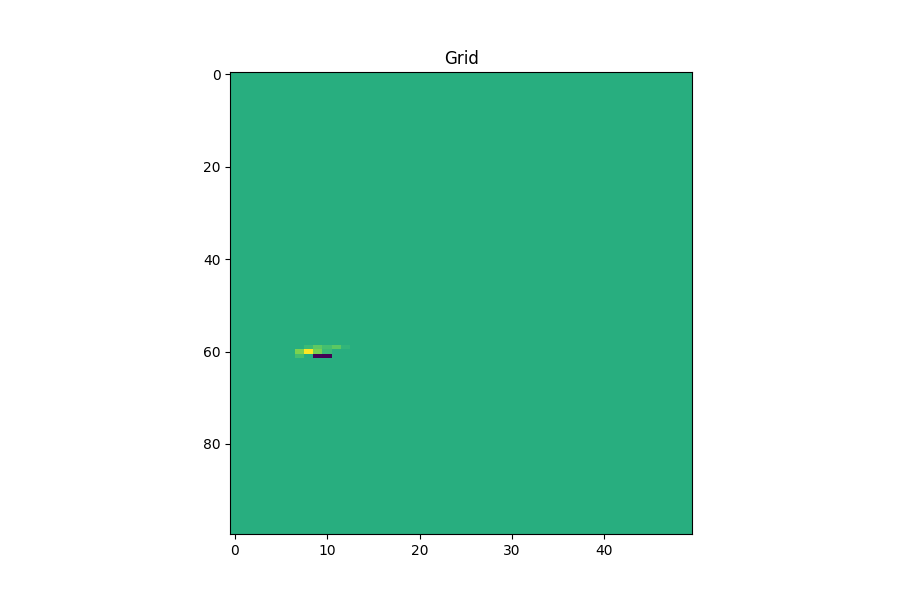

In [109]:
print(get_grid_counts())
plt.figure(figsize=(9,6))
plt.title('Grid')
plt.imshow(get_grid_counts(), interpolation='nearest', aspect=1/2)

In [110]:
for gx in range(0, GridX):
    for gy in range(0, GridY):
        marg = get_marginal(gx, gy)
        cond = get_conditional(gx, gy)
        if np.any(marg < 0):
            print(f"\x1b[31mMARGINAL [{gx}, {gy}] CONTAINS NEGATIVE ENTRIES\x1b[0m")
        if not np.all(np.isfinite(marg)):
            print(f"\x1b[31mMARGINAL [{gx}, {gy}] CONTAINS INFINITE ENTRIES\x1b[0m")
        if np.any(cond < 0):
            print(f"\x1b[31mCONDITIONAL [{gx}, {gy}] CONTAINS NEGATIVE ENTRIES\x1b[0m")
        if not np.all(np.isfinite(cond)):
            print(f"\x1b[31mCONDITIONAL [{gx}, {gy}] CONTAINS INFINITE ENTRIES\x1b[0m")

MARGINAL [0, 52] CONTAINS NEGATIVE ENTRIES
MARGINAL [0, 53] CONTAINS NEGATIVE ENTRIES
MARGINAL [0, 54] CONTAINS NEGATIVE ENTRIES
MARGINAL [0, 55] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 55] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 56] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 57] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 58] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 59] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 60] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 61] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 62] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 63] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 64] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 65] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 66] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 67] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 68] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 69] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 70] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 71] CONTAINS NEGATIVE ENTRIES
CONDITIONAL [0, 72] CONTAINS NEGATIVE ENTRIES


## Picked Grid Coordinates:

In [111]:
GX = 8
GY = 53

[[ 8.8281803e-44]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [-3.0316721e-13]
 [-8.6880505e-44]
 [-8.8281803e-44]
 [-8.8281803e-44]
 [-8.8281803e-44]
 [-8.8281803e-44]
 [-8.8281803e-44]
 [-8.8281803e-44]]
MARGINAL CONTAINS NEGATIVE ENTRIES
Marginal [-3.031672135556107e-13, 8.828180325246348e-44]
Conditional [0.0, 1.0]


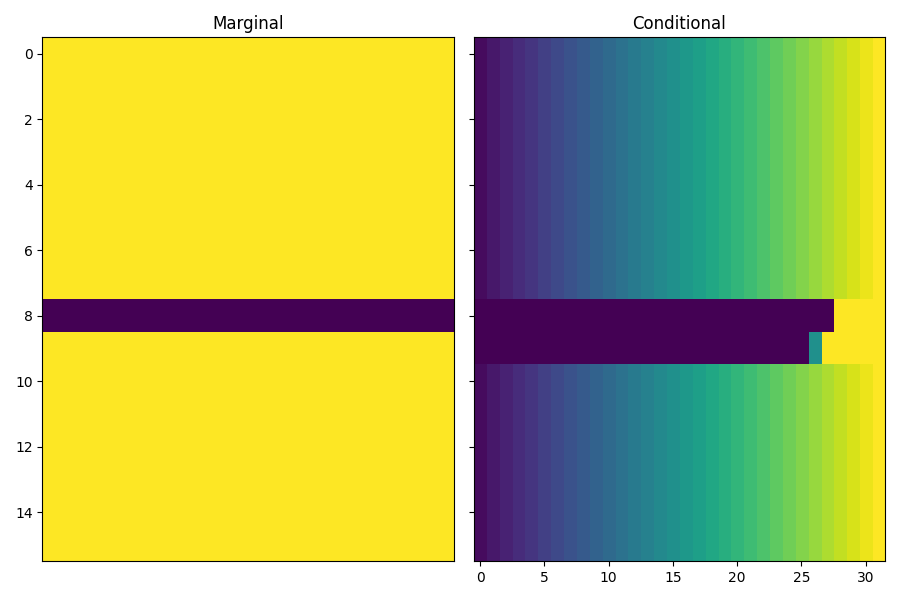

In [112]:
def show_grid(gx:int, gy:int):
    marg = get_marginal(gx, gy)
    cond = get_conditional(gx, gy)
    print(marg)
    if np.any(marg < 0):
        print("\x1b[31mMARGINAL CONTAINS NEGATIVE ENTRIES\x1b[0m")
    if not np.all(np.isfinite(marg)):
        print("\x1b[31mMARGINAL CONTAINS INFINITE ENTRIES\x1b[0m")
    if np.any(cond < 0):
        print("\x1b[31mCONDITIONAL CONTAINS NEGATIVE ENTRIES\x1b[0m")
    if not np.all(np.isfinite(cond)):
        print("\x1b[31mCONDITIONAL CONTAINS INFINITE ENTRIES\x1b[0m")
    print(f"Marginal [{np.amin(marg)}, {np.amax(marg)}]")
    print(f"Conditional [{np.amin(cond)}, {np.amax(cond)}]")

    f, axs = plt.subplots(ncols=2, sharey='row', figsize=(9,6))
    axs[0].set_title('Marginal')
    axs[0].imshow(marg, interpolation='nearest', aspect="auto")
    axs[0].set_xticks([])
    
    axs[1].set_title('Conditional')
    axs[1].imshow(cond, interpolation='nearest', aspect="auto")

show_grid(GX, GY)
plt.tight_layout()
plt.show()

Samples [0.0, 301.3125]


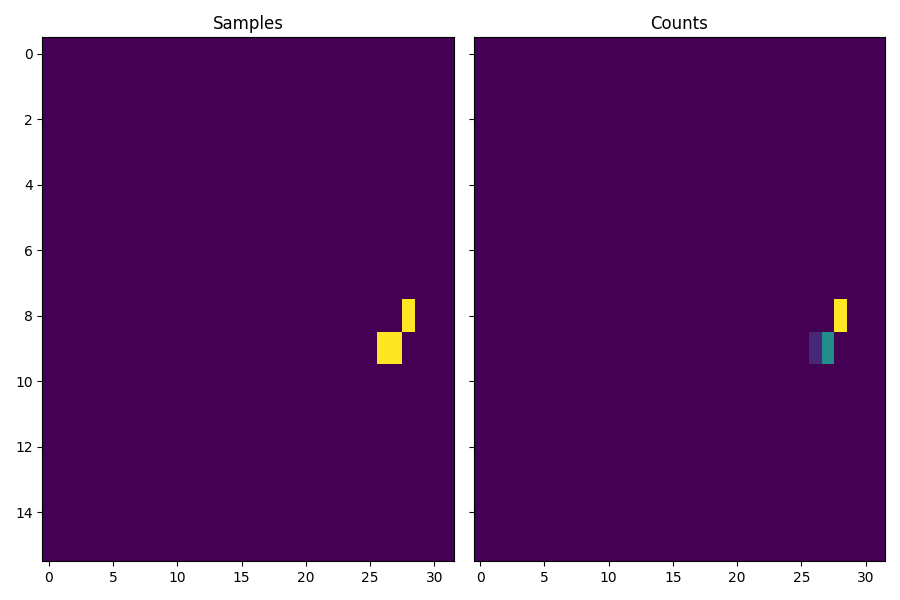

In [113]:
def show_sample_grid(gx:int, gy:int):
    samples = get_samples(gx, gy)
    counts  = get_counts(gx, gy)
    if np.any(samples < 0):
        print("\x1b[31mSAMPLES CONTAINS NEGATIVE ENTRIES\x1b[0m")
    if not np.all(np.isfinite(samples)):
        print("\x1b[31mSAMPLES CONTAINS INFINITE ENTRIES\x1b[0m")
    print(f"Samples [{np.amin(samples)}, {np.amax(samples)}]")

    norm = np.divide(samples, counts, out=np.zeros_like(samples), where=counts!=0)

    f, axs = plt.subplots(ncols=2, sharey='row', figsize=(9,6))
    axs[0].set_title('Samples')
    axs[0].imshow(norm, interpolation='nearest', aspect="auto")
    
    axs[1].set_title('Counts')
    axs[1].imshow(counts, interpolation='nearest', aspect="auto")

show_sample_grid(GX, GY)
plt.tight_layout()
plt.show()